In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from Preprocessing.preprocess import read_data
from scipy.optimize import minimize
import pandas as pd

In [2]:
chicken = pd.read_csv('./Data Lemak/preprocessed/pure fat/chicken/chicken_all.csv', header=None)
duck = pd.read_csv('./Data Lemak/preprocessed/pure fat/duck/duck_all.csv', header=None)
goat = pd.read_csv('./Data Lemak/preprocessed/pure fat/goat/goat_all.csv', header=None)
cow = pd.read_csv('./Data Lemak/preprocessed/pure fat/cow/cow_all.csv', header=None)
pig = pd.read_csv('./Data Lemak/preprocessed/pure fat/pig/pig_all.csv', header=None)
pig_chicken_25_75 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 25-75/pig_chicken_25_75_all.csv', header=None)
pig_chicken_50_50 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 50-50/pig_chicken_50_50_all.csv', header=None)
pig_chicken_75_25 = pd.read_csv('./Data Lemak/preprocessed/contamination/pig-chicken/pig-chicken 75-25/pig_chicken_75_25_all.csv', header=None)

In [3]:
chicken.shape

(1012, 46)

In [4]:
wavelength = chicken[0].copy()

In [5]:
scaler = MinMaxScaler()
for i in range(1, chicken.shape[1]):
    chicken[i] = scaler.fit_transform(chicken[i].values.reshape(-1, 1))
for i in range(1, duck.shape[1]):
    duck[i] = scaler.fit_transform(duck[i].values.reshape(-1, 1))
for i in range(1, goat.shape[1]):
    goat[i] = scaler.fit_transform(goat[i].values.reshape(-1, 1))
for i in range(1, cow.shape[1]):
    cow[i] = scaler.fit_transform(cow[i].values.reshape(-1, 1))
for i in range(1, pig.shape[1]):
    pig[i] = scaler.fit_transform(pig[i].values.reshape(-1, 1))
for i in range(pig_chicken_25_75.shape[1]):
    pig_chicken_25_75[i] = scaler.fit_transform(pig_chicken_25_75[i].values.reshape(-1, 1))
for i in range(pig_chicken_50_50.shape[1]):
    pig_chicken_50_50[i] = scaler.fit_transform(pig_chicken_50_50[i].values.reshape(-1, 1))
for i in range(pig_chicken_75_25.shape[1]):
    pig_chicken_75_25[i] = scaler.fit_transform(pig_chicken_75_25[i].values.reshape(-1, 1))

In [6]:
chicken

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,1804.50391,0.022371,0.026217,0.027905,0.027279,0.020807,0.029865,0.037963,0.031398,0.021219,...,0.029865,0.037963,0.073578,0.066700,0.051121,0.090144,0.047815,0.023297,0.032058,0.055073
1,1803.54102,0.028940,0.036770,0.031637,0.037496,0.019856,0.042592,0.029666,0.030443,0.017470,...,0.042592,0.029666,0.025408,0.079887,0.074537,0.042206,0.062010,0.047676,0.049844,0.048106
2,1802.57715,0.016754,0.044426,0.021293,0.039323,0.026841,0.054312,0.042135,0.024805,0.026000,...,0.054312,0.042135,0.073781,0.087829,0.053687,0.035534,0.037887,0.058782,0.065832,0.058917
3,1801.61328,0.019555,0.025290,0.035307,0.034642,0.022883,0.046429,0.034854,0.039682,0.028850,...,0.046429,0.034854,0.012876,0.051598,0.070075,0.079333,0.025857,0.094128,0.050146,0.064382
4,1800.64941,0.029844,0.031988,0.037141,0.029963,0.021910,0.034629,0.026536,0.040570,0.024133,...,0.034629,0.026536,0.071395,0.067335,0.063192,0.063483,0.046052,0.025891,0.057333,0.052036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,723.88477,0.051480,0.055737,0.057106,0.068717,0.062466,0.061388,0.070410,0.060558,0.057056,...,0.061388,0.070410,0.059790,0.118992,0.080897,0.070995,0.069724,0.054831,0.079345,0.077370
1008,722.68457,0.049708,0.066990,0.053097,0.065479,0.057399,0.066658,0.058403,0.052070,0.057576,...,0.066658,0.058403,0.064339,0.063083,0.098192,0.099076,0.086522,0.103191,0.057260,0.040659
1009,721.48438,0.059214,0.057497,0.070147,0.074183,0.051536,0.060123,0.055581,0.066045,0.051260,...,0.060123,0.055581,0.097447,0.092729,0.076248,0.081099,0.074204,0.063049,0.063437,0.056875
1010,720.28418,0.061951,0.051081,0.050347,0.072438,0.053659,0.052019,0.062770,0.037353,0.049503,...,0.052019,0.062770,0.061195,0.088992,0.076727,0.057607,0.089376,0.102537,0.073848,0.057358


In [7]:
chicken.loc[:, 1:]

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,0.022371,0.026217,0.027905,0.027279,0.020807,0.029865,0.037963,0.031398,0.021219,0.011014,...,0.029865,0.037963,0.073578,0.066700,0.051121,0.090144,0.047815,0.023297,0.032058,0.055073
1,0.028940,0.036770,0.031637,0.037496,0.019856,0.042592,0.029666,0.030443,0.017470,0.016740,...,0.042592,0.029666,0.025408,0.079887,0.074537,0.042206,0.062010,0.047676,0.049844,0.048106
2,0.016754,0.044426,0.021293,0.039323,0.026841,0.054312,0.042135,0.024805,0.026000,0.023393,...,0.054312,0.042135,0.073781,0.087829,0.053687,0.035534,0.037887,0.058782,0.065832,0.058917
3,0.019555,0.025290,0.035307,0.034642,0.022883,0.046429,0.034854,0.039682,0.028850,0.034800,...,0.046429,0.034854,0.012876,0.051598,0.070075,0.079333,0.025857,0.094128,0.050146,0.064382
4,0.029844,0.031988,0.037141,0.029963,0.021910,0.034629,0.026536,0.040570,0.024133,0.016721,...,0.034629,0.026536,0.071395,0.067335,0.063192,0.063483,0.046052,0.025891,0.057333,0.052036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.051480,0.055737,0.057106,0.068717,0.062466,0.061388,0.070410,0.060558,0.057056,0.071059,...,0.061388,0.070410,0.059790,0.118992,0.080897,0.070995,0.069724,0.054831,0.079345,0.077370
1008,0.049708,0.066990,0.053097,0.065479,0.057399,0.066658,0.058403,0.052070,0.057576,0.052479,...,0.066658,0.058403,0.064339,0.063083,0.098192,0.099076,0.086522,0.103191,0.057260,0.040659
1009,0.059214,0.057497,0.070147,0.074183,0.051536,0.060123,0.055581,0.066045,0.051260,0.043073,...,0.060123,0.055581,0.097447,0.092729,0.076248,0.081099,0.074204,0.063049,0.063437,0.056875
1010,0.061951,0.051081,0.050347,0.072438,0.053659,0.052019,0.062770,0.037353,0.049503,0.029091,...,0.052019,0.062770,0.061195,0.088992,0.076727,0.057607,0.089376,0.102537,0.073848,0.057358


In [8]:
X_chicken = chicken.loc[:, 1:]
X_cow = cow.loc[:, 1:]
X_duck = duck.loc[:, 1:]
X_goat = goat.loc[:, 1:]
X_pig = pig.loc[:, 1:]
y_chicken = np.array([[1,0,0,0,0] for _ in range(chicken.shape[1] - 1)])
y_cow = np.array([[0,1,0,0,0] for _ in range(cow.shape[1] - 1)])
y_duck = np.array([[0,0,1,0,0] for _ in range(duck.shape[1] - 1)])
y_goat = np.array([[0,0,0,1,0] for _ in range(goat.shape[1] - 1)])
y_pig = np.array([[0,0,0,0,1] for _ in range(pig.shape[1] - 1)])

In [9]:
X_chicken.T.shape, X_cow.T.shape, X_duck.T.shape, X_goat.T.shape, X_pig.T.shape

((45, 1012), (45, 1012), (45, 1012), (29, 1012), (184, 1012))

In [10]:
X = np.concatenate((X_chicken.T, X_cow.T, X_duck.T, X_goat.T, X_pig.T), axis=0)
y = np.concatenate((y_chicken, y_cow, y_duck, y_goat, y_pig), axis=0)

In [11]:
pd.DataFrame(X.T)

,0,1,2,3,4,5,6,7,8,9,...,338,339,340,341,342,343,344,345,346,347
0,0.022371,0.026217,0.027905,0.027279,0.020807,0.029865,0.037963,0.031398,0.021219,0.011014,...,0.017040,0.020656,0.024263,0.029266,0.025646,0.025162,0.024549,0.015515,0.014455,0.026667
1,0.028940,0.036770,0.031637,0.037496,0.019856,0.042592,0.029666,0.030443,0.017470,0.016740,...,0.016991,0.019673,0.017591,0.024235,0.023119,0.027417,0.019117,0.022872,0.012459,0.019120
2,0.016754,0.044426,0.021293,0.039323,0.026841,0.054312,0.042135,0.024805,0.026000,0.023393,...,0.017894,0.012431,0.033203,0.023642,0.028659,0.020032,0.018574,0.025104,0.012913,0.031452
3,0.019555,0.025290,0.035307,0.034642,0.022883,0.046429,0.034854,0.039682,0.028850,0.034800,...,0.027959,0.013359,0.033145,0.032511,0.031711,0.030067,0.029790,0.015983,0.015830,0.020130
4,0.029844,0.031988,0.037141,0.029963,0.021910,0.034629,0.026536,0.040570,0.024133,0.016721,...,0.018253,0.015247,0.029472,0.031360,0.017981,0.026808,0.018958,0.026728,0.012837,0.023859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007,0.051480,0.055737,0.057106,0.068717,0.062466,0.061388,0.070410,0.060558,0.057056,0.071059,...,0.047547,0.048422,0.051266,0.053929,0.054673,0.050628,0.045979,0.043515,0.050196,0.050371
1008,0.049708,0.066990,0.053097,0.065479,0.057399,0.066658,0.058403,0.052070,0.057576,0.052479,...,0.047629,0.041557,0.054593,0.056585,0.049599,0.044416,0.043591,0.041613,0.046689,0.039133
1009,0.059214,0.057497,0.070147,0.074183,0.051536,0.060123,0.055581,0.066045,0.051260,0.043073,...,0.046936,0.043953,0.040504,0.042707,0.049519,0.049615,0.031763,0.041991,0.031321,0.035668
1010,0.061951,0.051081,0.050347,0.072438,0.053659,0.052019,0.062770,0.037353,0.049503,0.029091,...,0.050889,0.035165,0.045766,0.046259,0.033971,0.046349,0.035673,0.042369,0.033751,0.036520


In [12]:
pd.DataFrame(y)

,0,1,2,3,4
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
343,0,0,0,0,1
344,0,0,0,0,1
345,0,0,0,0,1
346,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2)

In [14]:
from sklearn.ensemble import RandomForestClassifier

# GridSearchCV
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7714285714285715

In [17]:
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

array([[ 3,  2,  0,  0,  1],
       [ 0,  9,  1,  0,  1],
       [ 3,  0,  5,  0,  2],
       [ 0,  0,  0,  6,  3],
       [ 1,  0,  0,  0, 33]], dtype=int64)

In [18]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.82      0.82      0.82        11
           2       0.83      0.50      0.62        10
           3       1.00      0.67      0.80         9
           4       0.82      0.97      0.89        34

    accuracy                           0.80        70
   macro avg       0.78      0.69      0.72        70
weighted avg       0.81      0.80      0.79        70



In [19]:
wavelength[92]

1715.0957

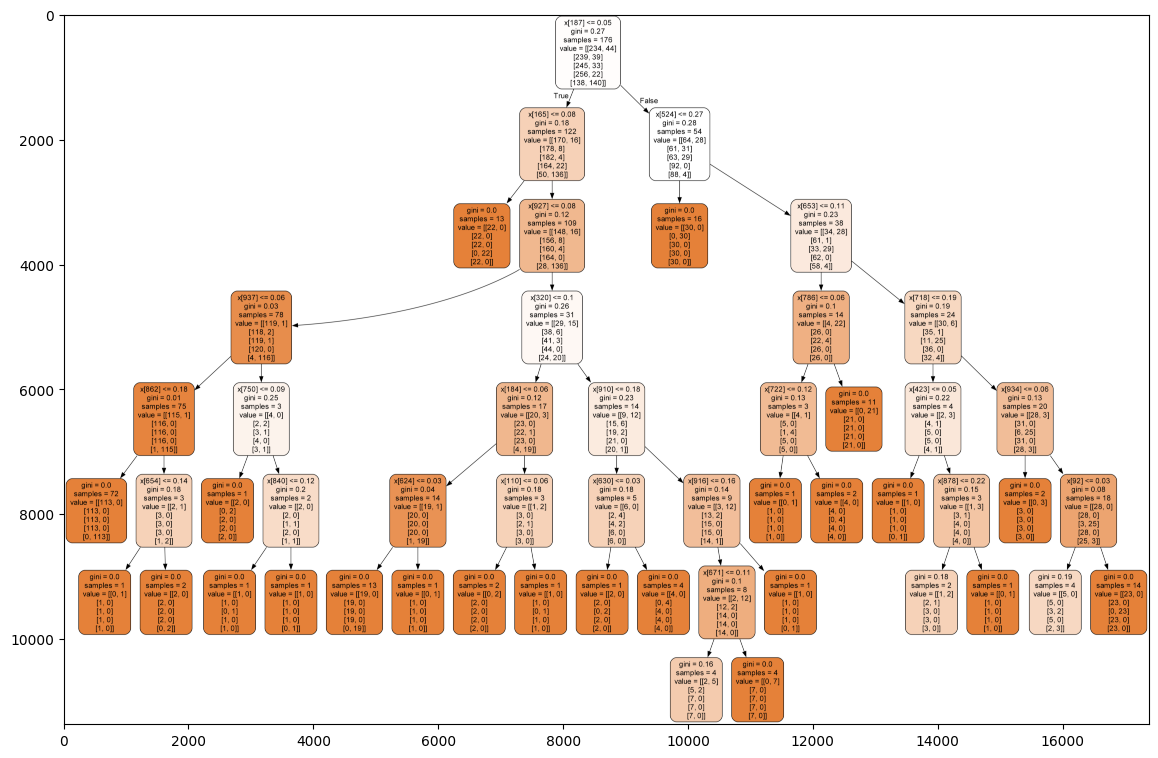

In [21]:
# Plot Tree
from sklearn.tree import export_graphviz

estimator = rf.estimators_[5]
export_graphviz(estimator, out_file='./Simulasi 3/tree.dot', 
                class_names = ['chicken', 'cow', 'duck', 'goat', 'pig'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', './Simulasi 3/tree.dot', '-o', './Simulasi 3/tree.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('./Simulasi 3/tree.png'))